# Basic Exercises on Data Importing - Understanding - Manipulating - Analysis - Visualization

## Section-1: The pupose of the below exercises (1-7) is to create dictionary and convert into dataframes, how to diplay etc...
## The below exercises required to create data 

### 1. Import the necessary libraries (pandas, numpy, datetime, re etc)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import re

# set the graphs to show in the jupyter notebook
%matplotlib inline

# set seabor graphs to a better style
sns.set(style="ticks")

## file path 
file_path = 'C:/Data_set/'

### 2. Run the below line of code to create a dictionary and this will be used for below exercises

In [2]:
raw_data = {"name": ['Bulbasaur', 'Charmander','Squirtle','Caterpie'],
            "evolution": ['Ivysaur','Charmeleon','Wartortle','Metapod'],
            "type": ['grass', 'fire', 'water', 'bug'],
            "hp": [45, 39, 44, 45],
            "pokedex": ['yes', 'no','yes','no']                        
            }

### 3. Assign it to a object called pokemon and it should be a pandas DataFrame

In [3]:
pokemon = pd.DataFrame(raw_data)

In [4]:
pokemon.head(2)

,name,evolution,type,hp,pokedex
0,Bulbasaur,Ivysaur,grass,45,yes
1,Charmander,Charmeleon,fire,39,no


### 4. If the DataFrame columns are in alphabetical order, change the order of the columns as name, type, hp, evolution, pokedex

In [5]:
pokemon = pokemon [['name', 'type', 'hp', 'evolution',  'pokedex']]

In [6]:
pokemon.head(2)

,name,type,hp,evolution,pokedex
0,Bulbasaur,grass,45,Ivysaur,yes
1,Charmander,fire,39,Charmeleon,no


### 5. Add another column called place, and insert places (lakes, parks, hills, forest etc) of your choice.

In [7]:
pokemon.loc[:, 'places'] = ('lakes', 'parks', 'hills', 'forest')

In [8]:
pokemon.head(2)

,name,type,hp,evolution,pokedex,places
0,Bulbasaur,grass,45,Ivysaur,yes,lakes
1,Charmander,fire,39,Charmeleon,no,parks


### 6. Display the data type of each column

In [9]:
pokemon.dtypes

name         object
type         object
hp            int64
evolution    object
pokedex      object
places       object
dtype: object

### 7. Display the info of dataframe

In [10]:
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       4 non-null      object
 1   type       4 non-null      object
 2   hp         4 non-null      int64 
 3   evolution  4 non-null      object
 4   pokedex    4 non-null      object
 5   places     4 non-null      object
dtypes: int64(1), object(5)
memory usage: 320.0+ bytes


## Section-2: The pupose of the below exercise (8-20) is to understand deleting data with pandas.
## The below exercises required to use wine.data

### 8. Import the dataset *wine.txt* from the folder and assign it to a object called wine

Please note that the original data text file doesn't contain any header. Please ensure that when you import the data, you should use a suitable argument so as to avoid data getting imported as header.

In [11]:
wine = pd.read_csv(file_path+'wine.txt', header = None) 

In [12]:
wine.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050


### 9. Delete the first, fourth, seventh, nineth, eleventh, thirteenth and fourteenth columns

In [13]:
wine.drop( columns = [0, 3, 6, 8, 10, 12, 13], inplace = True)
wine.head(2)

,1,2,4,5,7,9,11
0,14.23,1.71,15.6,127,3.06,2.29,1.04
1,13.20,1.78,11.2,100,2.76,1.28,1.05


### 10. Assign the columns as below:

The attributes are (dontated by Riccardo Leardi, riclea '@' anchem.unige.it):  
1) alcohol  
2) malic_acid  
3) alcalinity_of_ash  
4) magnesium  
5) flavanoids  
6) proanthocyanins  
7) hue 

In [14]:
wine.columns = ['alcohol', 
                'malic_acid', 
                'alcalinity_of_ash', 
                'magnesium', 'flavanoids', 
                'proanthocyanins', 
                'hue']
wine.head(2)

,alcohol,malic_acid,alcalinity_of_ash,magnesium,flavanoids,proanthocyanins,hue
0,14.23,1.71,15.6,127,3.06,2.29,1.04
1,13.20,1.78,11.2,100,2.76,1.28,1.05


### 11. Set the values of the first 3 values from alcohol column as NaN

In [15]:
wine.loc[0:2, 'alcohol' ] = np.nan
wine.head(3)

,alcohol,malic_acid,alcalinity_of_ash,magnesium,flavanoids,proanthocyanins,hue
0,NaN,1.71,15.6,127,3.06,2.29,1.04
1,NaN,1.78,11.2,100,2.76,1.28,1.05
2,NaN,2.36,18.6,101,3.24,2.81,1.03


### 12. Now set the value of the rows 3 and 4 of magnesium as NaN

In [16]:
wine.loc[2:3, 'magnesium'] = np.nan
wine.head(4)

,alcohol,malic_acid,alcalinity_of_ash,magnesium,flavanoids,proanthocyanins,hue
0,NaN,1.71,15.6,127.0,3.06,2.29,1.04
1,NaN,1.78,11.2,100.0,2.76,1.28,1.05
2,NaN,2.36,18.6,NaN,3.24,2.81,1.03
3,14.37,1.95,16.8,NaN,3.49,2.18,0.86


### 13. Fill the value of NaN with the number 10 in alcohol and 100 in magnesium

In [17]:
wine.alcohol = wine.alcohol.fillna(10)
wine.magnesium = wine.magnesium.fillna(100)
wine.head(4)

,alcohol,malic_acid,alcalinity_of_ash,magnesium,flavanoids,proanthocyanins,hue
0,10.00,1.71,15.6,127.0,3.06,2.29,1.04
1,10.00,1.78,11.2,100.0,2.76,1.28,1.05
2,10.00,2.36,18.6,100.0,3.24,2.81,1.03
3,14.37,1.95,16.8,100.0,3.49,2.18,0.86


### 14. Count the number of missing values in all columns.

In [18]:
wine.isna().sum()

alcohol              0
malic_acid           0
alcalinity_of_ash    0
magnesium            0
flavanoids           0
proanthocyanins      0
hue                  0
dtype: int64

### 15.  Create an array of 10 random numbers up until 10 and save it.

In [19]:
Random_array = np.random.randint(0, 11, 10)
Random_array

array([ 0,  9,  4,  4, 10,  6,  1,  1,  8,  4])

### 16.  Set the rows corresponding to the random numbers to NaN in the column *alcohol*

In [20]:
wine.loc[Random_array, 'alcohol' ] = np.nan
wine.head(12)

,alcohol,malic_acid,alcalinity_of_ash,magnesium,flavanoids,proanthocyanins,hue
0,NaN,1.71,15.6,127.0,3.06,2.29,1.04
1,NaN,1.78,11.2,100.0,2.76,1.28,1.05
2,10.00,2.36,18.6,100.0,3.24,2.81,1.03
3,14.37,1.95,16.8,100.0,3.49,2.18,0.86
4,NaN,2.59,21.0,118.0,2.69,1.82,1.04
5,14.20,1.76,15.2,112.0,3.39,1.97,1.05
6,NaN,1.87,14.6,96.0,2.52,1.98,1.02
7,14.06,2.15,17.6,121.0,2.51,1.25,1.06
8,NaN,1.64,14.0,97.0,2.98,1.98,1.08
9,NaN,1.35,16.0,98.0,3.15,1.85,1.01


### 17.  How many missing values do we have now?

In [21]:
wine.isna().sum()

alcohol              7
malic_acid           0
alcalinity_of_ash    0
magnesium            0
flavanoids           0
proanthocyanins      0
hue                  0
dtype: int64

### 18. Print only the non-null values in alcohol

In [22]:
non_null = wine.alcohol.dropna()
non_null

2      10.00
3      14.37
5      14.20
7      14.06
11     14.12
       ...  
173    13.71
174    13.40
175    13.27
176    13.17
177    14.13
Name: alcohol, Length: 171, dtype: float64

### 19. Delete the rows that contain missing values

In [23]:
wine = wine.dropna(axis = 0, how = 'any')

In [24]:
wine.head(4)

,alcohol,malic_acid,alcalinity_of_ash,magnesium,flavanoids,proanthocyanins,hue
2,10.00,2.36,18.6,100.0,3.24,2.81,1.03
3,14.37,1.95,16.8,100.0,3.49,2.18,0.86
5,14.20,1.76,15.2,112.0,3.39,1.97,1.05
7,14.06,2.15,17.6,121.0,2.51,1.25,1.06


### 20.  Reset the index, so it starts with 0 again

In [25]:
wine.reset_index(drop = True).head(4)

,alcohol,malic_acid,alcalinity_of_ash,magnesium,flavanoids,proanthocyanins,hue
0,10.00,2.36,18.6,100.0,3.24,2.81,1.03
1,14.37,1.95,16.8,100.0,3.49,2.18,0.86
2,14.20,1.76,15.2,112.0,3.39,1.97,1.05
3,14.06,2.15,17.6,121.0,2.51,1.25,1.06


## Section-3: The pupose of the below exercise (21-27) is to understand ***filtering & sorting*** data from dataframe.
## The below exercises required to use chipotle.tsv

This time we are going to pull data directly from the internet.  
Import the dataset directly from this link (https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv) and create dataframe called chipo

In [26]:
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'
chipotle = pd.read_csv(url, sep = '\t')
chipotle.head(2)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39


### 21. How many products cost more than $10.00? 

Use `str` attribute to remove the $ sign and convert the column to proper numeric type data before filtering.


In [27]:
chipotle['item_price'] = chipotle.item_price.str.replace('$', '').astype( float )

C:\Users\Mantu\AppData\Local\Temp/ipykernel_2656/1338568430.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  chipotle['item_price'] = chipotle.item_price.str.replace('$', '').astype( float )


In [28]:
product_cost_morethan_10 = chipotle.item_price
product_cost_morethan_10[product_cost_morethan_10>10].count()

1130

### 22. Print the Chipo Dataframe & info about data frame

In [29]:
chipotle

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75


In [30]:
chipotle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   order_id            4622 non-null   int64  
 1   quantity            4622 non-null   int64  
 2   item_name           4622 non-null   object 
 3   choice_description  3376 non-null   object 
 4   item_price          4622 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 180.7+ KB


### 23. What is the price of each item? 
- Delete the duplicates in item_name and quantity
- Print a data frame with only two columns `item_name` and `item_price`
- Sort the values from the most to less expensive

In [31]:
chipotle.drop_duplicates( subset = ['item_name', 'quantity']
                        ).groupby('item_name')['item_price'
                                              ].agg(sum
                                                   ).sort_values( ascending = True
                                                                ).reset_index( drop = False)

,item_name,item_price
0,Chips and Roasted Chili-Corn Salsa,2.39
1,Chips and Mild Fresh Tomato Salsa,3.00
2,Izze,3.39
3,Chips and Tomatillo-Green Chili Salsa,7.17
4,Salad,7.40
5,Burrito,7.40
6,Crispy Tacos,7.40
7,Canned Soda,7.63
8,Veggie Crispy Tacos,8.49
9,Veggie Salad,8.49


### 24. Sort by the name of the item

In [32]:
chipotle.sort_values( by = 'item_name', ascending = True).reset_index(drop = True)

,order_id,quantity,item_name,choice_description,item_price
0,1360,2,6 Pack Soft Drink,[Diet Coke],12.98
1,148,1,6 Pack Soft Drink,[Diet Coke],6.49
2,749,1,6 Pack Soft Drink,[Coke],6.49
3,754,1,6 Pack Soft Drink,[Diet Coke],6.49
4,1076,1,6 Pack Soft Drink,[Coke],6.49
...,...,...,...,...,...
4617,948,1,Veggie Soft Tacos,"[Roasted Chili Corn Salsa, [Fajita Vegetables,...",8.75
4618,322,1,Veggie Soft Tacos,"[Fresh Tomato Salsa, [Black Beans, Cheese, Sou...",8.75
4619,1132,1,Veggie Soft Tacos,"[Roasted Chili Corn Salsa (Medium), [Black Bea...",8.49
4620,688,1,Veggie Soft Tacos,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25


### 25. What was the quantity of the most expensive item ordered?

In [33]:
pd.DataFrame(chipotle.loc[:, ['order_id', 'quantity', 'item_name', 'item_price'] ].max()).T

,order_id,quantity,item_name,item_price
0,1834,15,Veggie Soft Tacos,44.25


### 26. How many times were a Veggie Salad Bowl ordered?

In [34]:
np.count_nonzero(chipotle.item_name == 'Veggie Salad Bowl')

18

### 27. How many times people orderd more than one Canned Soda?

In [35]:
np.count_nonzero(((chipotle.item_name == 'Canned Soda'))&(chipotle.quantity>1))

20

## Section-4: The purpose of the below exercises is to understand how to perform aggregations of data frame
## The below exercises (28-33) required to use occupation.csv

###  28. Import the dataset occupation.csv and assign object as users

In [36]:
users = pd.read_csv(file_path+'occupation.csv', sep ='|')

In [37]:
users.head(2)

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043


### 29. Discover what is the mean age per occupation

In [38]:
users.groupby('occupation')['age'].agg(np.mean).reset_index().head(2)

,occupation,age
0,administrator,38.746835
1,artist,31.392857


### 30. Discover the Male ratio per occupation and sort it from the most to the least.

Use numpy.where() to encode gender column.

In [39]:
users['ismale'] = np.where(users.gender == 'M', 1, 0)
(users.groupby('occupation')['ismale'].sum()/users.groupby('occupation')['gender'].count()
).sort_values(ascending = False)

occupation
doctor           1.000000
engineer         0.970149
technician       0.962963
retired          0.928571
programmer       0.909091
executive        0.906250
scientist        0.903226
entertainment    0.888889
lawyer           0.833333
salesman         0.750000
educator         0.726316
student          0.693878
other            0.657143
marketing        0.615385
writer           0.577778
none             0.555556
administrator    0.544304
artist           0.535714
librarian        0.431373
healthcare       0.312500
homemaker        0.142857
dtype: float64

### 31. For each occupation, calculate the minimum and maximum ages

In [40]:
users.groupby('occupation')['age'].agg([np.max, np.min]).reset_index()

,occupation,amax,amin
0,administrator,70,21
1,artist,48,19
2,doctor,64,28
3,educator,63,23
4,engineer,70,22
5,entertainment,50,15
6,executive,69,22
7,healthcare,62,22
8,homemaker,50,20
9,lawyer,53,21


### 32. For each combination of occupation and gender, calculate the mean age

In [41]:
mao = pd.DataFrame(users.groupby(['occupation', 'gender'])['age'].agg([np.mean]).reset_index())
mao.pivot(index = 'occupation', columns = 'gender')

mean           
gender                 F          M
occupation                         
administrator  40.638889  37.162791
artist         30.307692  32.333333
doctor               NaN  43.571429
educator       39.115385  43.101449
engineer       29.500000  36.600000
entertainment  31.000000  29.000000
executive      44.000000  38.172414
healthcare     39.818182  45.400000
homemaker      34.166667  23.000000
lawyer         39.500000  36.200000
librarian      40.000000  40.000000
marketing      37.200000  37.875000
none           36.500000  18.600000
other          35.472222  34.028986
programmer     32.166667  33.216667
retired        70.000000  62.538462
salesman       27.000000  38.555556
scientist      28.333333  36.321429
student        20.750000  22.669118
technician     38.000000  32.961538
writer         37.631579  35.346154

### 33.  For each occupation present the percentage of women and men

In [42]:
p = users.groupby(['occupation', 'gender']).agg({'gender' : 'count'})

In [43]:
q = users.groupby('occupation').agg('count')

In [44]:
r = p.div ( q , level = 'occupation' ) *  100

In [45]:
pd.DataFrame(r.loc[:, 'gender']).head(2)

gender
occupation    gender          
administrator F       45.56962
              M       54.43038

## Section-6: The purpose of the below exercises is to understand how to use lambda-apply-functions
## The below exercises (34-41) required to use student-mat.csv and student-por.csv files 

### 34. Import the datasets *student-mat* and *student-por* and append them and assigned object as df

In [46]:
student_mat = pd.read_csv(file_path+'student-mat.csv')

In [47]:
student_mat.head(2)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6


In [48]:
student_por = pd.read_csv(file_path+'student-por.csv')

In [49]:
student_por.head(2)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11


In [50]:
df = student_mat.append(student_por)

In [51]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


### 35. For the purpose of this exercise slice the dataframe from 'school' until the 'guardian' column

In [52]:
df.loc[:, 'school':'guardian']

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother
4,GP,F,16,U,GT3,T,3,3,other,other,home,father
...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,course,mother
645,MS,F,18,U,LE3,T,3,1,teacher,services,course,mother
646,MS,F,18,U,GT3,T,1,1,other,other,course,mother
647,MS,M,17,U,LE3,T,3,1,services,services,course,mother


### 36. Create a lambda function that captalize strings (example: if we give at_home as input function and should give At_home as output.

In [53]:
def str_value(x):
    return x.capitalize()

In [54]:
str_value('at_home')

'At_home'

In [55]:
str_valuee = input()
list(map(lambda x: x.capitalize(), [(str_valuee)]))

at_home


['At_home']

In [56]:
str_valueee = {1: [input()]}
str_va = pd.DataFrame(data = str_valueee)
str_va.loc[:, 1].apply( lambda x: x.capitalize())

at_home


0    At_home
Name: 1, dtype: object

### 37. Capitalize both Mjob and Fjob variables using above lamdba function

In [57]:
df.loc[:, ['Mjob', 'Fjob' ]].applymap(lambda x : str_value(x))

,Mjob,Fjob
0,At_home,Teacher
1,At_home,Other
2,At_home,Other
3,Health,Services
4,Other,Other
...,...,...
644,Services,Other
645,Teacher,Services
646,Other,Other
647,Services,Services


### 38. Print the last elements of the data set. (Last few records)

In [58]:
df.tail(4)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10
648,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,4,10,11,11


### 39. Did you notice the original dataframe is still lowercase? Why is that? Fix it and captalize Mjob and Fjob.

In [59]:
df.Mjob = df.Mjob.apply(str_value)
df.Fjob = df.Fjob.apply(str_value)
df.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,At_home,Teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,At_home,Other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,At_home,Other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,Health,Services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,Other,Other,...,4,3,2,1,2,5,4,6,10,10


### 40. Create a function called majority that return a boolean value to a new column called legal_drinker

In [60]:
def majority (x):
    if x == 1:
        return True
    else:
        return False

In [61]:
df['legal_drinker'] = [majority(1) if x>=21 else majority(0) for x in df["age"]]

In [62]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,legal_drinker
0,GP,F,18,U,GT3,A,4,4,At_home,Teacher,...,3,4,1,1,3,6,5,6,6,False
1,GP,F,17,U,GT3,T,1,1,At_home,Other,...,3,3,1,1,3,4,5,5,6,False
2,GP,F,15,U,LE3,T,1,1,At_home,Other,...,3,2,2,3,3,10,7,8,10,False
3,GP,F,15,U,GT3,T,4,2,Health,Services,...,2,2,1,1,5,2,15,14,15,False
4,GP,F,16,U,GT3,T,3,3,Other,Other,...,3,2,1,2,5,4,6,10,10,False


### 41. Multiply every number of the dataset by 10. 

In [63]:
df.dtypes.head(2)

school    object
sex       object
dtype: object

In [64]:
(df.select_dtypes('int64') * 10).head(2)

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,180,40,40,20,20,0,40,30,40,10,10,30,60,50,60,60
1,170,10,10,10,20,0,50,30,30,10,10,30,40,50,50,60


## Section-6: The purpose of the below exercises is to understand how to perform simple joins
## The below exercises (42-48) required to use cars1.csv and cars2.csv files 

### 42. Import the datasets cars1.csv and cars2.csv and assign names as cars1 and cars2

In [65]:
cars1 = pd.read_csv(file_path+'cars1.csv')
cars1.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,18.0,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu,NaN,NaN,NaN,NaN,NaN
1,15.0,8,350,165,3693,11.5,70,1,buick skylark 320,NaN,NaN,NaN,NaN,NaN
2,18.0,8,318,150,3436,11.0,70,1,plymouth satellite,NaN,NaN,NaN,NaN,NaN
3,16.0,8,304,150,3433,12.0,70,1,amc rebel sst,NaN,NaN,NaN,NaN,NaN
4,17.0,8,302,140,3449,10.5,70,1,ford torino,NaN,NaN,NaN,NaN,NaN


In [66]:
cars2 = pd.read_csv(file_path+'cars2.csv')
cars2.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car
0,33.0,4,91,53,1795,17.4,76,3,honda civic
1,20.0,6,225,100,3651,17.7,76,1,dodge aspen se
2,18.0,6,250,78,3574,21.0,76,1,ford granada ghia
3,18.5,6,250,110,3645,16.2,76,1,pontiac ventura sj
4,17.5,6,258,95,3193,17.8,76,1,amc pacer d/l


   ### 43. Print the information to cars1 by applying below functions 
   hint: Use different functions/methods like type(), head(), tail(), columns(), info(), dtypes(), index(), shape(), count(), size(), ndim(), axes(), describe(), memory_usage(), sort_values(), value_counts()
   Also create profile report using pandas_profiling.Profile_Report

In [67]:
#### Erorr occured cannot import name 'ABCIndexClass' from 'pandas.core.dtypes.generic'
#### writing UDF to get summary 

### 44. It seems our first dataset has some unnamed blank columns, fix cars1

In [68]:
cars1.dropna(axis = 1,inplace=True)
cars1

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car
0,18.0,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
193,24.0,6,200,81,3012,17.6,76,1,ford maverick
194,22.5,6,232,90,3085,17.6,76,1,amc hornet
195,29.0,4,85,52,2035,22.2,76,1,chevrolet chevette
196,24.5,4,98,60,2164,22.1,76,1,chevrolet woody


### 45. What is the number of observations in each dataset?

In [69]:
cars1.shape[0]

198

In [70]:
cars2.shape[0]

200

### 46. Join cars1 and cars2 into a single DataFrame called cars

In [71]:
cars = pd.concat(([cars1, cars2]), axis = 0)
cars

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car
0,18.0,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
195,27.0,4,140,86,2790,15.6,82,1,ford mustang gl
196,44.0,4,97,52,2130,24.6,82,2,vw pickup
197,32.0,4,135,84,2295,11.6,82,1,dodge rampage
198,28.0,4,120,79,2625,18.6,82,1,ford ranger


### 47. There is a column missing, called owners. Create a random number Series from 15,000 to 73,000.

In [72]:
cars.insert( loc= 9 , column = 'owners', 
            value = pd.Series(np.random.randint(15000, 73000, (cars.shape[0]))))

In [73]:
cars

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car,owners
0,18.0,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu,29901
1,15.0,8,350,165,3693,11.5,70,1,buick skylark 320,23581
2,18.0,8,318,150,3436,11.0,70,1,plymouth satellite,16187
3,16.0,8,304,150,3433,12.0,70,1,amc rebel sst,68714
4,17.0,8,302,140,3449,10.5,70,1,ford torino,52003
...,...,...,...,...,...,...,...,...,...,...
195,27.0,4,140,86,2790,15.6,82,1,ford mustang gl,68094
196,44.0,4,97,52,2130,24.6,82,2,vw pickup,34219
197,32.0,4,135,84,2295,11.6,82,1,dodge rampage,34505
198,28.0,4,120,79,2625,18.6,82,1,ford ranger,43076


### 48. Add the column owners to cars

In [74]:
### alredy added inthe previous ans
cars

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car,owners
0,18.0,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu,29901
1,15.0,8,350,165,3693,11.5,70,1,buick skylark 320,23581
2,18.0,8,318,150,3436,11.0,70,1,plymouth satellite,16187
3,16.0,8,304,150,3433,12.0,70,1,amc rebel sst,68714
4,17.0,8,302,140,3449,10.5,70,1,ford torino,52003
...,...,...,...,...,...,...,...,...,...,...
195,27.0,4,140,86,2790,15.6,82,1,ford mustang gl,68094
196,44.0,4,97,52,2130,24.6,82,2,vw pickup,34219
197,32.0,4,135,84,2295,11.6,82,1,dodge rampage,34505
198,28.0,4,120,79,2625,18.6,82,1,ford ranger,43076


## Section-7: The purpose of the below exercises is to understand how to perform date time operations

### 49. Write a Python script to display the
- a. Current date and time
- b. Current year
- c. Month of year
- d. Week number of the year
- e. Weekday of the week
- f. Day of year
- g. Day of the month
- h. Day of week

In [75]:
x = pd.Timestamp.now()
print('1.Current date and time: ',x )
print('2.Current year: ',x.year )
print('3.Month of year: ',x.month )
print('4.Week number of the year: ',x.weekofyear )
print('5.Weekday of the week: ',x.day_name() )
print('6.Day of year: ',x.day_of_year )
print('7.Day of the month: ',x.day )
print('8.Day of week: ',x.day_of_week )

1.Current date and time:  2022-07-16 13:47:33.526473
2.Current year:  2022
3.Month of year:  7
4.Week number of the year:  28
5.Weekday of the week:  Saturday
6.Day of year:  197
7.Day of the month:  16
8.Day of week:  5


In [76]:
print(dir(pd.Timestamp))

['__add__', '__array_priority__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__pyx_vtable__', '__radd__', '__reduce__', '__reduce_cython__', '__reduce_ex__', '__repr__', '__rsub__', '__setattr__', '__setstate__', '__setstate_cython__', '__sizeof__', '__str__', '__sub__', '__subclasshook__', '__weakref__', '_date_repr', '_freq', '_freqstr', '_repr_base', '_round', '_set_freq', '_short_repr', '_time_repr', 'asm8', 'astimezone', 'ceil', 'combine', 'ctime', 'date', 'day', 'day_name', 'day_of_week', 'day_of_year', 'dayofweek', 'dayofyear', 'days_in_month', 'daysinmonth', 'dst', 'floor', 'fold', 'freq', 'freqstr', 'fromisocalendar', 'fromisoformat', 'fromordinal', 'fromtimestamp', 'hour', 'is_leap_year', 'is_month_end', 'is_month_start', 'is_quarter_end', 'is_quarter_start', 'is_year_end', 'is_year_start', 'iso

### 50. Write a Python program to convert a string to datetime.
Sample String : Jul 1 2014 2:43PM 

Expected Output : 2014-07-01 14:43:00

In [77]:
dt.datetime.strptime('Jul 1 2014 2:43PM', '%b %d %Y %I:%M%p').strftime('%Y-%m-%d %H:%M:%S')

'2014-07-01 14:43:00'

### 51. Write a Python program to subtract five days from current date.

Current Date : 2015-06-22

5 days before Current Date : 2015-06-17

In [78]:
dob2 = '2015-06-22'
dob1 = '2015-06-17'
pd.to_datetime( dob2, format = '%Y-%m-%d' ).day-pd.to_datetime( dob1, format = '%Y-%m-%d' ).day

5

### 52. Write a Python program to convert unix timestamp string to readable date.

Sample Unix timestamp string : 1284105682
    
Expected Output : 2010-09-10 13:31:22

In [79]:
d2 = pd.Timestamp.utcfromtimestamp(1284105682)
pd.to_datetime(d2, utc = True).tz_convert('Asia/Kolkata')

Timestamp('2010-09-10 13:31:22+0530', tz='Asia/Kolkata')

### 53. Convert the below Series to pandas datetime : 

DoB = pd.Series(["07Sep59","01Jan55","15Dec47","11Jul42"])

Make sure that the year is 19XX not 20XX

In [80]:
DoB = pd.to_datetime(pd.Series(["07Sep59","01Jan55","15Dec47","11Jul42"])
                    )  + pd.DateOffset( years = -100)  

In [81]:
DoB

0   1959-09-07
1   1955-01-01
2   1947-12-15
3   1942-07-11
dtype: datetime64[ns]

### 54. Write a Python program to get days between two dates. 

In [82]:
## give input as ymd in str 
def datediff(p, n):
    x = pd.to_datetime(p, format = '%Y-%m-%d')
    y = pd.to_datetime(n, format = '%Y-%m-%d')
    return (x.day) - (y.day)

In [83]:
datediff( p = '2020-05-20', n = '2020-05-01')

19

### 55. Convert the below date to datetime and then change its display format using the .dt module

Date = "15Dec1989"

Result : "Friday, 15 Dec 98"

In [84]:
Date = dt.datetime.strptime('15Dec1989', '%d%b%Y').strftime('%A, %d %b %y')
Date

'Friday, 15 Dec 89'

## The below exercises (56-66) required to use wind.data file 

### About wind.data:

The data have been modified to contain some missing values, identified by NaN.  

1. The data in 'wind.data' has the following format:

### 56. Import the dataset wind.data and assign it to a variable called data and replace the first 3 columns by a proper date time index

In [85]:
wind_data = pd.read_csv(file_path+'wind.data')
wind_data.head()

,Yr,Mo,Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,61,1,1,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,61,1,2,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,61,1,3,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,61,1,4,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,61,1,5,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


In [86]:
wind_data.insert(loc = 0, column = 'Date', value = pd.to_datetime(
    wind_data[["Yr","Mo","Dy"]].astype(str).agg('-'.join, axis=1)))

In [87]:
wind_data.drop( columns = ['Yr', 'Mo', 'Dy'], inplace = True)

In [88]:
wind_data.head(2)

,Date,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,2061-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,2061-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83


### 57. Year 2061 is seemingly imporoper. Convert every year which are < 70 to 19XX instead of 20XX.

In [89]:
wind_data['Date'] = np.where(wind_data['Date'].dt.year > 1978,
                             wind_data['Date'] - pd.offsets.DateOffset(years = 100), 
                             wind_data['Date'])

In [90]:
wind_data.head()

,Date,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


### 58. Set the right dates as the index. Pay attention at the data type, it should be datetime64[ns].

In [91]:
wind_data = wind_data.set_index ('Date')
wind_data.head()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


### 59. Compute how many values are missing for each location over the entire record.  
#### They should be ignored in all calculations below. 

In [92]:
wind_data.isnull().sum()

RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64

### 60. Compute how many non-missing values there are in total.

In [93]:
wind_data.notnull().sum()

RPT    6568
VAL    6571
ROS    6572
KIL    6569
SHA    6572
BIR    6574
DUB    6571
CLA    6572
MUL    6571
CLO    6573
BEL    6574
MAL    6570
dtype: int64

### 61. Calculate the mean windspeeds over all the locations and all the times.
#### A single number for the entire dataset.

In [94]:
np.mean(wind_data.fillna(0)).mean() ## FILLING NULL VALUE AS THEY SHOULD BE IGNORED IN ALL CALCULATIONS

10.223864592840467

In [95]:
wind_data.fillna(0, inplace = True) ## FILLING NULL VALUE AS THEY SHOULD BE IGNORED IN ALL CALCULATIONS

In [96]:
wind_data.head()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,0.00,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1961-01-02,14.71,0.00,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,0.00,8.50,7.67,12.75,12.71
1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


### 62. Create a DataFrame called loc_stats and calculate the min, max and mean windspeeds and standard deviations of the windspeeds at each location over all the days 

#### A different set of numbers for each location.

In [97]:
loc_stats1 = wind_data.describe()
loc_stats1.head()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
count,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000
mean,12.351704,10.639457,11.656979,6.301672,10.452653,7.092254,9.792872,8.492469,8.489714,8.706007,13.121007,15.589588
std,5.628245,5.271060,5.011816,3.608631,4.938742,3.968683,4.980816,4.501204,4.169870,4.504892,5.835037,6.708793
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.130000,0.000000
25%,8.120000,6.670000,8.000000,3.580000,6.750000,4.000000,6.000000,5.090000,5.370000,5.330000,8.710000,10.710000


In [98]:
def describe_udf(x):
    return pd.Series( [ x.mean(), x.std(), x.min(), x.max()],
            index = [ 'mean', 'std', 'min','max' ])

In [99]:
loc_stats2 = wind_data.apply(describe_udf)

In [100]:
loc_stats2

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
mean,12.351704,10.639457,11.656979,6.301672,10.452653,7.092254,9.792872,8.492469,8.489714,8.706007,13.121007,15.589588
std,5.628245,5.271060,5.011816,3.608631,4.938742,3.968683,4.980816,4.501204,4.169870,4.504892,5.835037,6.708793
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.130000,0.000000
max,35.800000,33.370000,33.840000,28.460000,37.540000,26.160000,30.370000,31.080000,25.880000,28.210000,42.380000,42.540000


### 63. Create a DataFrame called day_stats and calculate the min, max and mean windspeed and standard deviations of the windspeeds across all the locations at each day.

#### A different set of numbers for each day.

In [101]:
day_stats = wind_data.apply(describe_udf, axis = 1)
day_stats.head()

,mean,std,min,max
Date,,,,
1961-01-01,11.933333,4.614681,0.00,18.50
1961-01-02,10.391667,4.467057,0.00,17.54
1961-01-03,10.671667,4.859876,0.00,18.50
1961-01-04,6.619167,3.198126,1.79,11.75
1961-01-05,10.630000,2.445356,6.17,13.33


### 64. Find the average windspeed in January for each location.  
#### Treat January 1961 and January 1962 both as January.

In [102]:
jan_windspeed = wind_data[wind_data.index.month == 1].mean()
jan_windspeed

RPT    14.820717
VAL    12.891416
ROS    13.299624
KIL     7.199498
SHA    11.625914
BIR     8.054839
DUB    11.819355
CLA     9.495000
MUL     9.543208
CLO    10.053566
BEL    14.550520
MAL    18.028763
dtype: float64

### 65. Calculate the mean windspeed for each month in the dataset.  
#### Treat January 1961 and January 1962 as *different* months.
#### (hint: first find a  way to create an identifier unique for each month.)

In [103]:
monthly_windspeed = wind_data.groupby( lambda x: (x.month, x.year)).mean()

In [104]:
monthly_windspeed.head(2)

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
"(1, 1961)",14.362581,11.601613,13.431613,7.736774,10.358387,8.588065,11.184839,8.947097,9.085806,10.107419,13.880968,14.703226
"(1, 1962)",14.783871,13.160323,12.591935,7.538065,11.779677,8.720000,14.211935,9.600000,9.670000,11.498710,16.369355,15.661613


### 66. Calculate the min, max and mean windspeeds and standard deviations of the windspeeds across all locations for each week (assume that the first week starts on January 2 1961) for the first 52 weeks.

In [105]:
weekly_windspeed = wind_data.resample('W',loffset='1D').agg(['min','max','mean','std']) 

C:\Users\Mantu\AppData\Local\Temp/ipykernel_2656/423876707.py:1: FutureWarning: 'loffset' in .resample() and in Grouper() is deprecated.

>>> df.resample(freq="3s", loffset="8H")

becomes:

>>> from pandas.tseries.frequencies import to_offset
>>> df = df.resample(freq="3s").mean()
>>> df.index = df.index.to_timestamp() + to_offset("8H")

  weekly_windspeed = wind_data.resample('W',loffset='1D').agg(['min','max','mean','std'])


In [106]:
weekly_windspeed.head()

RPT                                VAL                    \
              min    max       mean       std    min    max       mean   
Date                                                                     
1961-01-02  15.04  15.04  15.040000       NaN  14.96  14.96  14.960000   
1961-01-09  10.58  18.50  13.541429  2.631321   0.00  16.88   9.845714   
1961-01-16   9.04  19.75  12.468571  3.555392   3.54  12.08   8.967143   
1961-01-23   4.92  19.83  13.204286  5.337402   3.42  14.37   9.862857   
1961-01-30   0.00  25.04  17.040000  8.616204   9.96  23.91  16.141429   

                        ROS         ...        CLO              BEL         \
                 std    min    max  ...       mean       std    min    max   
Date                                ...                                      
1961-01-02       NaN  13.17  13.17  ...  12.580000       NaN  18.50  18.50   
1961-01-09  5.643406   7.62  12.33  ...   8.497143  1.704941   5.46  17.54   
1961-01-16  3.148945   7.08  19.50  ...   7.571429  4.084293   5.25  20.71   
1961-01-23  3.837785   7.29  20.79  ...   8.124286  4.783952   6.50  15.92   
1961-01-30  5.170224  12.67  25.84  ...  15.640000  3.713368  14.04  27.71   

                                   MAL                              
                 mean       std    min    max       mean       std  
Date                                                                
1961-01-02  18.500000       NaN  15.04  15.04  15.040000       NaN  
1961-01-09  12.481429  4.349139  10.88  16.46  13.238571  1.773062  
1961-01-16  11.125714  5.552215   5.17  16.92  11.024286  4.692355  
1961-01-23   9.821429  3.626584   6.79  17.96  11.434286  4.237239  
1961-01-30  20.930000  5.210726  17.50  27.63  22.530000  3.874721  

[5 rows x 48 columns]

## The below exercises (67-70) required to use appl_1980_2014.csv  file

In [107]:
appl = pd.read_csv(file_path + 'appl_1980_2014.csv')
appl

,Date,Open,High,Low,Close,Volume,Adj Close
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52
...,...,...,...,...,...,...,...
8460,1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41
8461,1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
8462,1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39
8463,1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42


### 67. Import the file appl_1980_2014.csv and assign it to a variable called 'apple'

In [108]:
apple = appl
apple

,Date,Open,High,Low,Close,Volume,Adj Close
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52
...,...,...,...,...,...,...,...
8460,1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41
8461,1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
8462,1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39
8463,1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42


### 68.  Check out the type of the columns

In [109]:
apple.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Volume         int64
Adj Close    float64
dtype: object

### 69. Transform the Date column as a datetime type

In [110]:
apple.Date = pd.to_datetime(apple['Date'])

In [111]:
apple.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Volume                int64
Adj Close           float64
dtype: object

### 70.  Set the date as the index

In [112]:
apple.set_index('Date')

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52
...,...,...,...,...,...,...
1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41
1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39


### 71.  Is there any duplicate dates?

In [113]:
apple.duplicated('Date').sum()

0

### 72.  The index is from the most recent date. Sort the data so that the first entry is the oldest date.

In [114]:
apple.sort_index(ascending = False, inplace = True)

In [115]:
apple.set_index('Date', inplace=True)

In [116]:
apple

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-12,28.75,28.87,28.75,28.75,117258400,0.45
1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42
1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39
1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41
...,...,...,...,...,...,...
2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52
2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03


### 73. Get the last business day of each month

In [117]:
last_business_day = apple[apple.index.is_month_end]

In [118]:
last_business_day

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-31,34.25,34.25,34.13,34.13,8937600,0.53
1981-03-31,24.75,24.75,24.50,24.50,3998400,0.38
1981-04-30,28.38,28.62,28.38,28.38,3152800,0.44
1981-06-30,26.13,26.13,26.00,26.00,8976800,0.41
1981-07-31,25.00,25.12,25.00,25.00,2738400,0.39
...,...,...,...,...,...,...
2014-01-31,495.18,501.53,493.55,500.60,116199300,70.69
2014-02-28,529.08,532.75,522.12,526.24,92992200,74.76
2014-03-31,539.23,540.81,535.93,536.74,42167300,76.25


In [119]:
last_business_day2 = apple.resample('M').last()
last_business_day2

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-31,34.25,34.25,34.13,34.13,8937600,0.53
1981-01-31,28.50,28.50,28.25,28.25,11547200,0.44
1981-02-28,26.50,26.75,26.50,26.50,3690400,0.41
1981-03-31,24.75,24.75,24.50,24.50,3998400,0.38
1981-04-30,28.38,28.62,28.38,28.38,3152800,0.44
...,...,...,...,...,...,...
2014-03-31,539.23,540.81,535.93,536.74,42167300,76.25
2014-04-30,592.64,599.43,589.80,590.09,114160200,83.83
2014-05-31,637.98,644.17,628.90,633.00,141005200,90.43


### 74.  What is the difference in days between the first day and the oldest

In [120]:
apple.index[-1] - apple.index[0]

Timedelta('12261 days 00:00:00')

### 75.  How many months in the data we have?

In [121]:
apple.index.month.shape[0]

8465

## Section-8: The purpose of the below exercises is to understand how to create basic graphs

### 76. Plot the 'Adj Close' value. Set the size of the figure to 13.5 x 9 inches

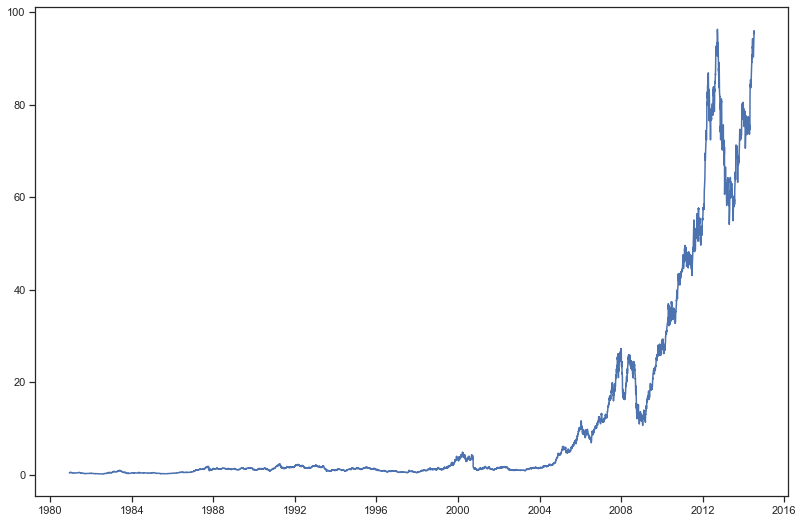

In [122]:
plt.figure( figsize = (13.5, 9))
plt.plot(apple['Adj Close'])
plt.show()

## The below exercises (77-80) required to use Online_Retail.csv file

### 77. Import the dataset from this Online_Retail.csv and assign it to a variable called online_rt

In [123]:
online_rt = pd.read_csv(file_path + 'Online_Retail.csv', encoding = 'latin')
online_rt

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/11 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/11 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/11 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/11 12:50,4.15,12680.0,France


### 78. Create a barchart with the 10 countries that have the most 'Quantity' ordered except UK

In [124]:
mstqu = online_rt.groupby('Country')['Quantity'].max().reset_index()

In [125]:
b = mstqu.sort_values(by = 'Quantity', ascending = False).reset_index(drop = True)

In [126]:
c = b.loc[1:10]

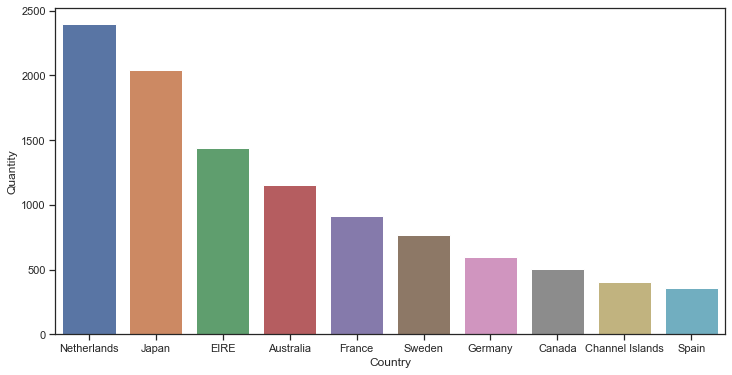

In [127]:
plt.figure(figsize = (12,6))
sns.barplot( y = c.Quantity, x = c.Country)
plt.show()

### 79.  Exclude negative Quatity entries

In [128]:
no_neg_qty = online_rt[online_rt.Quantity>0].reset_index(drop = True)
no_neg_qty.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom


### 80. Create a scatterplot with the Quantity per UnitPrice by CustomerID for the top 3 Countries
Hint: First we need to find top-3 countries based on revenue, then create scater plot between Quantity and Unitprice for each country separately


In [129]:
online_rt['revenue'] = online_rt.Quantity * online_rt.UnitPrice
online_rt.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34


In [130]:
topcountries = online_rt.groupby(['Country'
                                 ])['revenue'
                                   ].sum().reset_index().sort_values(by='revenue', ascending = False)

In [131]:
topcountries = topcountries[topcountries.Country!='United Kingdom']

In [132]:
topcountries=topcountries.loc[24:14]

In [133]:
topcountries

,Country,revenue
24,Netherlands,284661.54
10,EIRE,263276.82
14,Germany,221698.21


In [134]:
Netherlands = online_rt[online_rt.Country=='Netherlands'].reset_index(drop = True)
EIRE = online_rt[online_rt.Country=='EIRE'].reset_index(drop = True)
Germany = online_rt[online_rt.Country=='Germany'].reset_index(drop = True)

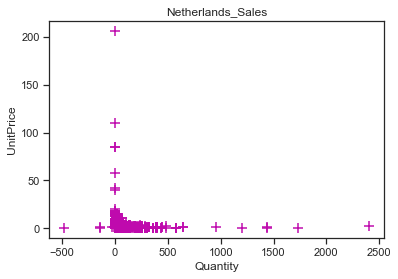

In [135]:
plt.scatter( x = Netherlands.Quantity, y = Netherlands.UnitPrice, c= '#bf0aad', s = 100, marker = '+' )
plt.xlabel( 'Quantity' )
plt.ylabel( 'UnitPrice' )
plt.title('Netherlands_Sales')
plt.show()

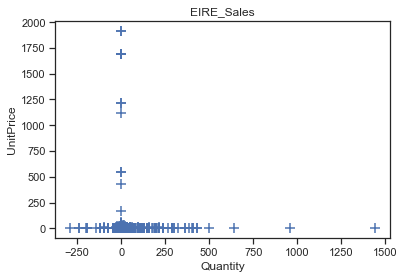

In [136]:
plt.scatter( x = EIRE.Quantity, y = EIRE.UnitPrice,  s = 100, marker = '+' )
plt.xlabel( 'Quantity' )
plt.ylabel( 'UnitPrice' )
plt.title('EIRE_Sales')
plt.show()

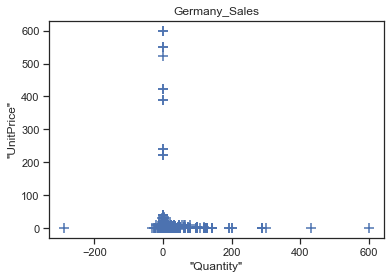

In [137]:
plt.scatter( x = Germany.Quantity, y = Germany.UnitPrice,  s = 100, marker = '+' )
plt.xlabel('"Quantity"')
plt.ylabel('"UnitPrice"')
plt.title('Germany_Sales')
plt.show()

## The below exercises (81-90) required to use FMCG_Company_Data_2019.csv file

### 81. Import the dataset FMCG_Company_Data_2019.csv and assign it to a variable called company_data

In [138]:
company_data = pd.read_csv(file_path+'FMCG_Company_Data_2019.csv')
company_data

,Month,FaceCream,FaceWash,ToothPaste,Soap,Shampo,Moisturizer,Total_Units,Total_Revenue,Total_Profit
0,Jan-19,2500,1500,5200,9200,1200,1500,21100,3584890,211000
1,Feb-19,2630,1200,5100,6100,2100,1200,18330,2864979,183300
2,Mar-19,2140,1340,4550,9550,3550,1340,22470,4058082,224700
3,Apr-19,3400,1130,5870,8870,1870,1130,22270,2890646,222700
4,May-19,3600,1740,4560,7760,1560,1740,20960,2997280,209600
5,Jun-19,2760,1555,4890,7490,1890,1555,20140,2857866,201400
6,Jul-19,2980,1120,4780,8980,1780,1120,29550,5735655,295500
7,Aug-19,3700,1400,5860,9960,2860,1400,36140,5196932,361400
8,Sep-19,3540,1780,6100,8100,2100,1780,23400,3060720,234000
9,Oct-19,1990,1890,8300,10300,2300,1890,26670,4661916,266700


### 82. Create line chart for Total Revenue of all months with following properties
- X label name = Month
- Y label name = Total Revenue

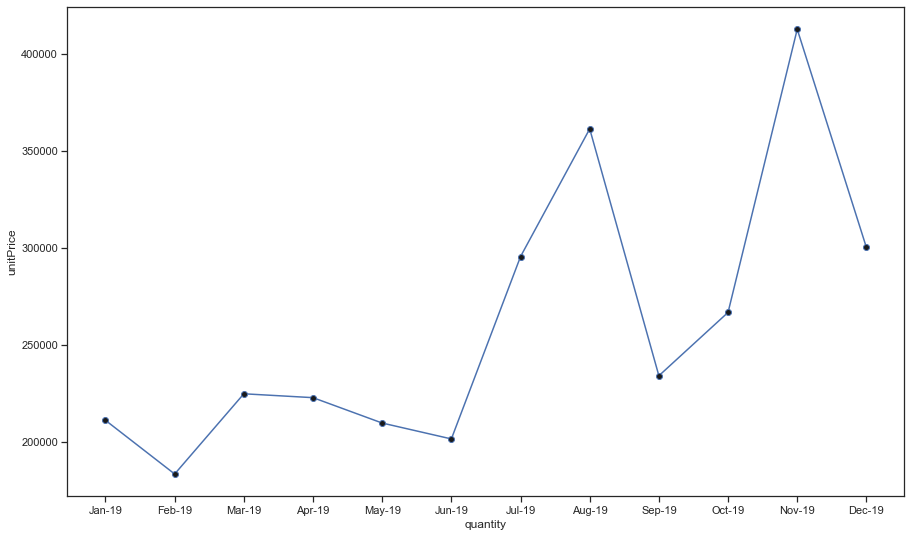

In [139]:
plt.figure(figsize=(15, 9))
plt.plot(company_data.Month, company_data.Total_Profit, marker='o', markerfacecolor='k')
plt.xlabel( 'quantity' )
plt.ylabel( 'unitPrice' )
plt.show()

### 83. Create line chart for Total Units of all months with following properties
- X label name = Month
- Y label name = Total Units
- Line Style dotted and Line-color should be red
- Show legend at the lower right location.

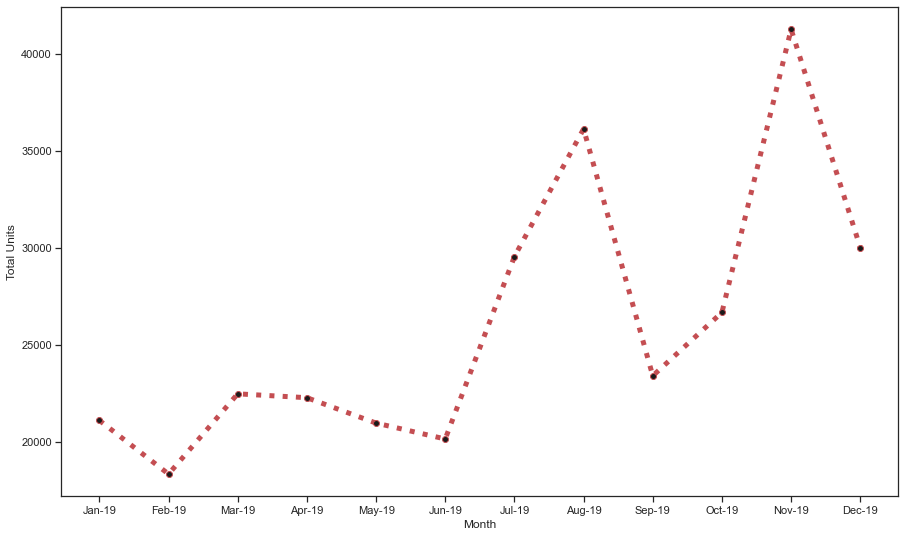

In [140]:
plt.figure(figsize=(15, 9))
plt.plot(company_data.Month, company_data.Total_Units, color='r', marker='o', markerfacecolor='k', 
         linestyle=':', linewidth=5)
plt.xlabel( 'Month' )
plt.ylabel( 'Total Units' )
plt.show()

### 84. Read all product sales data (Facecream, FaceWash, Toothpaste, Soap, Shampo, Moisturizer) and show it  using a multiline plot
- Display the number of units sold per month for each product using multiline plots. (i.e., Separate Plotline for each product ).

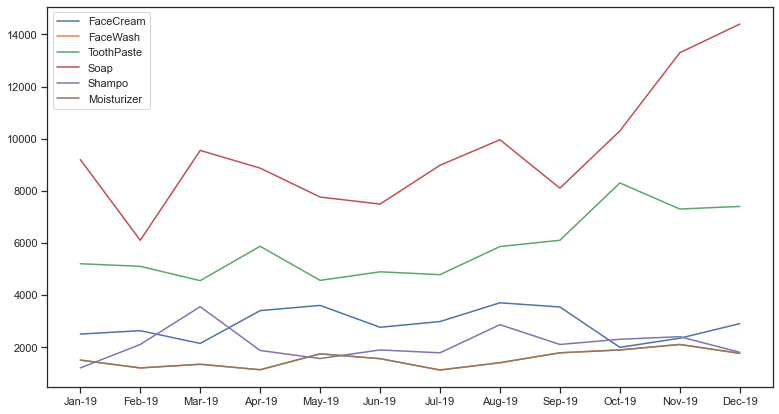

In [141]:
plt.figure(figsize=(13,7))
plt.plot(company_data.Month, company_data.FaceCream, label = 'FaceCream')
plt.plot(company_data.Month, company_data.FaceWash, label = 'FaceWash') 
plt.plot(company_data.Month, company_data.ToothPaste, label = 'ToothPaste')
plt.plot(company_data.Month, company_data.Soap, label = 'Soap')
plt.plot(company_data.Month, company_data.Shampo, label = 'Shampo')
plt.plot(company_data.Month, company_data.Moisturizer, label = 'Moisturizer')
plt.legend(loc=0)
plt.show()

### 85. Create Bar Chart for soap of all months and Save the chart in folder

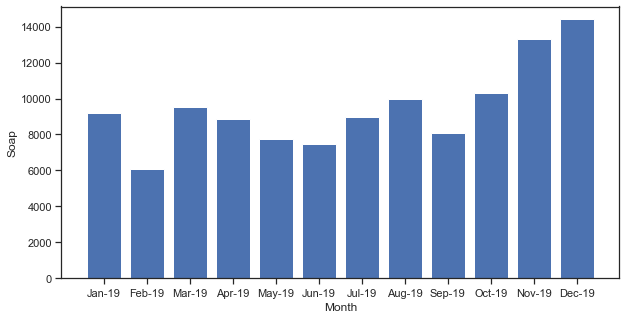

In [142]:
plt.figure(figsize = (10, 5))
plt.bar(company_data.Month, company_data.Soap)
plt.xlabel('Month')
plt.ylabel('Soap')
plt.savefig(file_path, dpi=150)
plt.show()

### 86. Create Stacked Bar Chart for Soap, Shampo, ToothPaste for each month
The bar chart should display the number of units sold per month for each product. Add a separate bar for each product in the same chart.

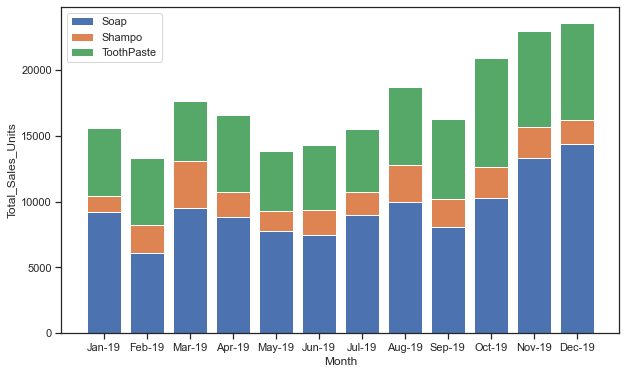

In [143]:
plt.figure(figsize=(10,6))
plt.bar( x = company_data.Month, height = company_data.Soap, label = 'Soap')
plt.bar( x = company_data.Month, height = company_data.Shampo, 
        bottom = company_data.Soap , label = 'Shampo')
plt.bar( x = company_data.Month, height = company_data.ToothPaste, 
        bottom = np.add(company_data.Soap, company_data.Shampo ) , label = 'ToothPaste')
plt.xlabel ('Month')
plt.ylabel ('Total_Sales_Units')
plt.legend()
plt.show()

### 87. Create Histogram for Total Revenue

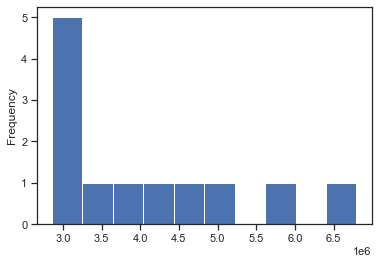

In [144]:
company_data.Total_Revenue.plot(kind = 'hist')
plt.show()

### 88. Calculate total sales data (quantity) for 2019 for each product and show it using a Pie chart. Understand percentage contribution from each product

In [145]:
TSD = [company_data.FaceCream.sum(), company_data.FaceWash.sum(), company_data.ToothPaste.sum(),
       company_data.Soap.sum(),  company_data.Shampo.sum(), company_data.Moisturizer.sum()]

In [146]:
label = ['FaceCream', 'FaceWash', 'ToothPaste', 'Soap', 'Shampo',  'Moisturizer']

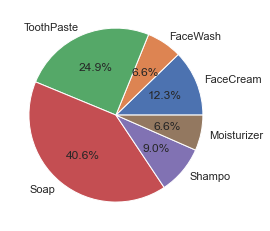

In [147]:
plt.pie(TSD, labels = label, autopct='%1.1f%%')
plt.show()

### 89. Create line plots for Soap & Facewash of all months in a single plot using Subplot

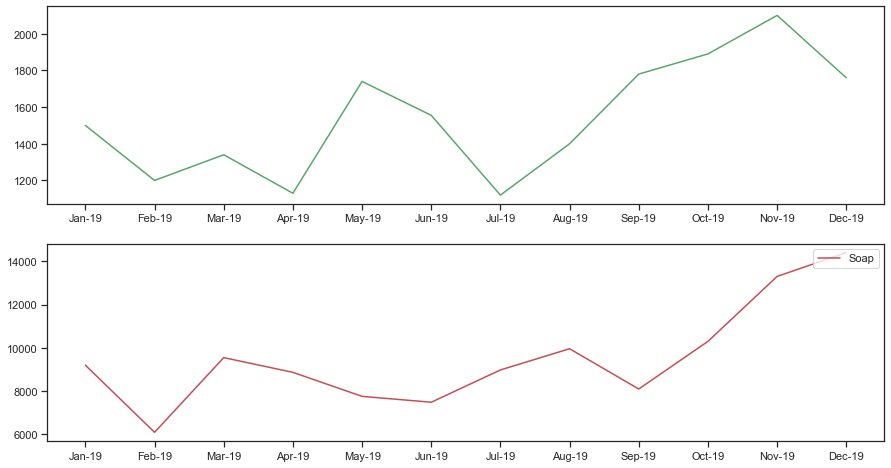

In [148]:
fig , ax= plt.subplots( 2, 1, figsize = (15, 8) )
ax[1].plot(company_data.Month, company_data.Soap, label = 'Soap', c ='r')
plt.legend(loc=0)
ax[0].plot(company_data.Month, company_data.FaceWash, label = 'Facewash', c= 'g')
plt.legend(loc=1)
plt.show()


### 90. Create Box Plot for Total Profit variable

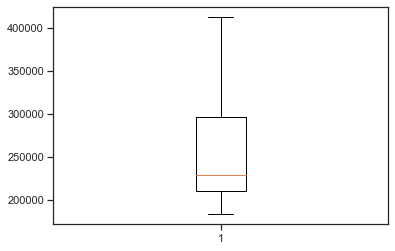

In [149]:
plt.boxplot(company_data.Total_Profit)
plt.show()